In [1]:
import math
from random import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdb

/Users/armaangoel/.local/share/virtualenvs/Clustering-wcG5dRBm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
class centroid:
    def __init__(self, mins, maxs):
        self.coords = [random()*(maxs[ind]-mins[ind]) + mins[ind] for ind, mini in enumerate(mins)]
    
    def dist(self, data):
        sum_sqd_diff = [np.square(data[ind] - self.coords[ind]) for ind, coord in enumerate(self.coords)]
        sum_sqd_diff = np.sum(sum_sqd_diff)
        return np.sqrt(sum_sqd_diff)
    
    def e_all(cts, data):
        result = []
        
        dist_tot = 0
        
        for ind in range(len(data[0])):
            mini_ind = 0
            mini = cts[0].dist(np.swapaxes(data,0,1)[ind])
    
            for ct_ind in range(1,len(cts)):
                dist = cts[ct_ind].dist(np.swapaxes(data,0,1)[ind])
                dist_tot += dist
                if dist < mini:
                    mini_ind = ct_ind
                    mini = dist
            
            result.append(mini_ind)
            
#         print(dist_tot/len(cts)/len(data[0]))
#         print(result)
        return result
    
    
    def m(self, data):
        self.coords = [np.average(data[dim]) for dim in range(len(data))]
        
    def m_all(result, cts, data):
        for ind, ct in enumerate(cts):
            input_data = np.array([np.swapaxes(data,0,1)[pot_ind] for pot_ind in range(len(result)) if result[pot_ind] == ind])   
            if input_data != []:
                input_data = np.swapaxes(input_data,0,1)
                cts[ind].m(input_data)
                                                        
    
    def update(cts, data):
        result = centroid.e_all(cts, data)
        centroid.m_all(result, cts, data)
        
        return cts
    
    def data_range(data):
        mins = [np.min(data[ind]) for ind in range(len(data))]    
        maxs = [np.max(data[ind]) for ind in range(len(data))] 
        return mins, maxs
        
                          
    def fit(num, iters, data):
        mins, maxs = centroid.data_range(data)
        cts = [centroid(mins, maxs) for n in range(num)]
        
        for val in range(iters):
            centroid.update(cts, data)
            
        return cts
            
    
    def plot(cts=None, data=None):
        if data is not None:
            plt.scatter(data[0],data[1])
            
        
        if cts is not None:
            for ct in cts:
                plt.scatter(ct.coords[0], ct.coords[1])
            

In [21]:
data = pd.read_csv('data.csv')
x = data['V1'].values
y = data['V2'].values

data = np.array([x,y])

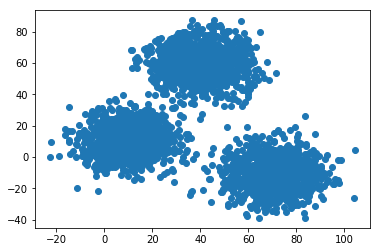

In [22]:
centroid.plot(data=data)

In [47]:
cts = centroid.fit(3, 1, data)

/Users/armaangoel/.local/share/virtualenvs/Clustering-wcG5dRBm/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


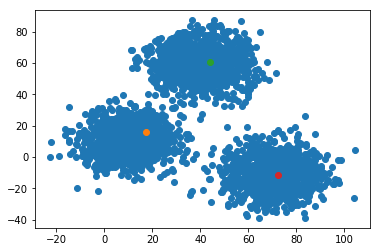

In [48]:
centroid.plot(cts=cts, data=data)